In [23]:
import pandas as pd

In [24]:
dst=pd.read_csv('iris.csv')

In [25]:
dst.shape

(150, 6)

In [26]:
dst

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
x=dst.iloc[:,:-1]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [28]:
y=dst.iloc[:,-1:]

In [29]:
import numpy as np

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier()
dts.fit(x_train,y_train)
pred=dts.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print("accuracy score",accuracy_score(pred,y_test)) #gini

accuracy score 1.0


In [34]:
cls_entro=DecisionTreeClassifier(criterion='entropy') #entropy
cls_entro.fit(x_train,y_train)
pred=cls_entro.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [35]:
cls_entro=DecisionTreeClassifier(criterion='entropy',min_samples_split=50)
cls_entro.fit(x_train,y_train)
pred=cls_entro.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


In [36]:
from sklearn.tree import export_graphviz


In [37]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [38]:
from six import StringIO

In [39]:
from IPython.display import Image
import pydotplus

In [43]:
dot_data=StringIO() 
#x.columns.names=['']
#y.columns.names=['']
#x.values
y.columns.values

array(['Species'], dtype=object)

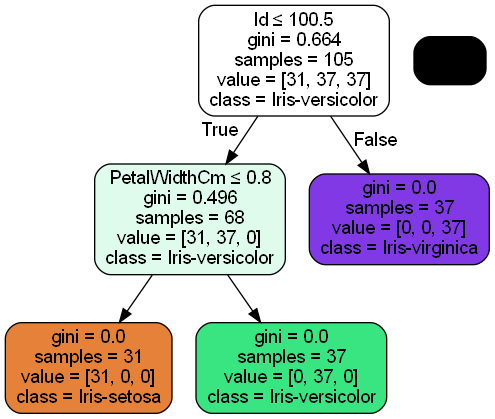

In [46]:
export_graphviz(dts,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=x.columns,class_names=np.unique(y.values))
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())